In [136]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

f = h5py.File("new_uncoated.h5oina")

resolution = np.concatenate((np.array(f['1/EDS/Header/Y Cells']),np.array(f['1/EDS/Header/X Cells'])))

X = np.array(f['1/EDS/Data/X']).reshape(resolution)
Y = np.array(f['1/EDS/Data/Y']).reshape(resolution)
Sn = np.array(f['1/EDS/Data/Window Integral/Sn Lα1']).reshape(resolution)


In [165]:
print(f['1/Electron Image/Header'].keys())

np.array(f['1/EDS/Header'])

<KeysViewHDF5 ['Acquisition Date', 'Analysis Label', 'Analysis Unique Identifier', 'Beam Voltage', 'Bounding Box Size', 'Drift Correction', 'Dwell Time', 'Magnification', 'Number Frames Averaged', 'Project File', 'Project Label', 'Project Notes', 'Relative Offset', 'Relative Size', 'Site Label', 'Site Notes', 'Specimen Label', 'Specimen Notes', 'Stage Position', 'Tilt Angle', 'Working Distance', 'X Cells', 'X Step', 'Y Cells', 'Y Step']>


array(['Acquisition Date', 'Analysis Label', 'Analysis Unique Identifier',
       'Beam Voltage', 'Binning', 'Bounding Box Size', 'Channel Width',
       'Detector Azimuth', 'Detector Elevation', 'Detector Serial Number',
       'Detector Type Id', 'Drift Correction', 'Energy Range',
       'Magnification', 'Number Channels', 'Number Frames',
       'Process Time', 'Processor Type', 'Project File', 'Project Label',
       'Project Notes', 'Relative Offset', 'Relative Size', 'Site Label',
       'Site Notes', 'Specimen Label', 'Specimen Notes', 'Stage Position',
       'Start Channel', 'Strobe Area', 'Strobe FWHM', 'Tilt Angle',
       'Window Type', 'Working Distance', 'X Cells', 'X Step', 'Y Cells',
       'Y Step'], dtype='<U26')

C:\Users\viklund\AppData\Local\Temp\ipykernel_16980\2867388435.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


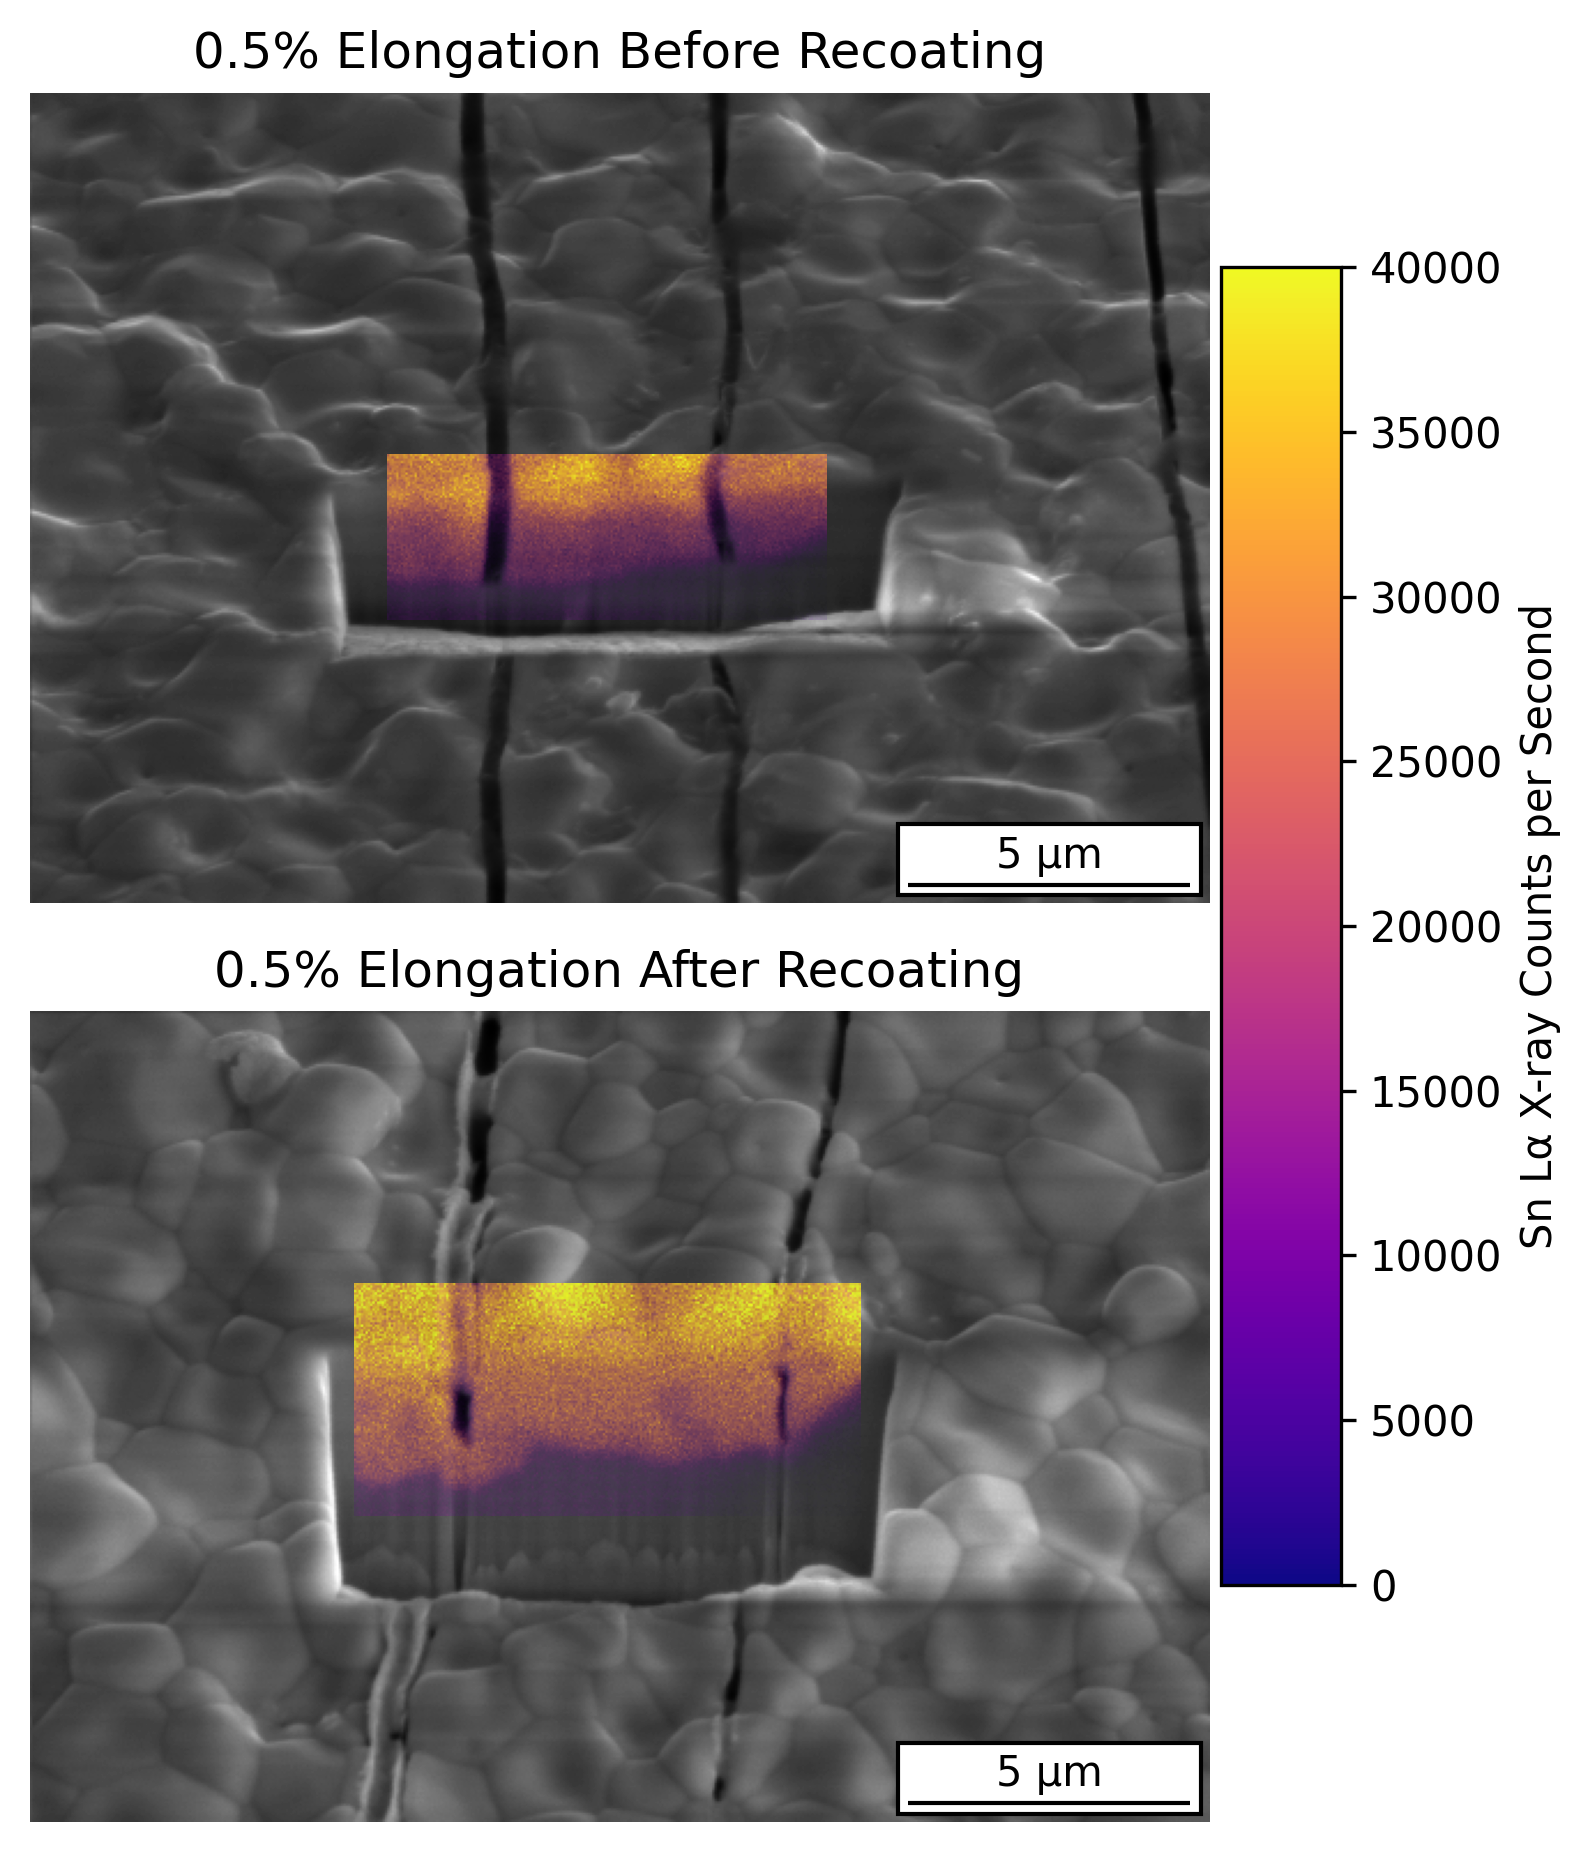

In [175]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.colors import Normalize

fig, axs = plt.subplots(2,1,dpi=300,figsize=(8.0139,6.2739))
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')

axs[0].set_axis_off()
axs[1].set_axis_off()



norm = Normalize(vmin=0,vmax=40000)

def add_sizebar(ax, size):
    asb = AnchoredSizeBar(ax.transData,
                          size,
                          label=f"{size} μm",
                          label_top=True,
                          loc='lower right',
                          color='black',
                          pad=0.25, borderpad=0.2, sep=2,
                          frameon=True)
    ax.add_artist(asb)

add_sizebar(axs[0],5)
add_sizebar(axs[1],5)

f = h5py.File("new_uncoated.h5oina")


#SEM Image Plot

SEM_resolution = np.concatenate((np.array(f['1/Electron Image/Header/Y Cells']),np.array(f['1/Electron Image/Header/X Cells'])))
SEM_extent = (0,f['1/Electron Image/Header/Bounding Box Size'][0],
              f['1/Electron Image/Header/Bounding Box Size'][1],0)

SE = np.array(f['1/Electron Image/Data/SE/Electron Image 9']).reshape(SEM_resolution)

axs[0].imshow(SE,extent=SEM_extent,cmap='gist_gray')


resolution = np.concatenate((np.array(f['1/EDS/Header/Y Cells']),np.array(f['1/EDS/Header/X Cells'])))
EDS_extent = (f['1/EDS/Header/Relative Offset'][0]*f['1/Electron Image/Header/Bounding Box Size'][0],
              f['1/EDS/Header/Relative Offset'][0]*f['1/Electron Image/Header/Bounding Box Size'][0]+f['1/EDS/Header/Bounding Box Size'][0],
              
              f['1/EDS/Header/Relative Offset'][1]*f['1/Electron Image/Header/Bounding Box Size'][1]+f['1/EDS/Header/Bounding Box Size'][1],
              f['1/EDS/Header/Relative Offset'][1]*f['1/Electron Image/Header/Bounding Box Size'][1],)


Sn = np.array(f['1/EDS/Data/Window Integral/Sn Lα1']).reshape(resolution)
Time = np.array(f['1/EDS/Data/Live Time']).reshape(resolution)

axs[0].imshow(Sn,extent=EDS_extent,alpha=Sn/Sn.max(),cmap='plasma',norm=norm)

axs[0].set_xlim(SEM_extent[0],SEM_extent[1])
axs[0].set_ylim(SEM_extent[2],SEM_extent[3])

axs[0].set_title("0.5% Elongation Before Recoating")




f = h5py.File("new_recoated.h5oina")



#SEM Image Plot

SEM_resolution = np.concatenate((np.array(f['1/Electron Image/Header/Y Cells']),np.array(f['1/Electron Image/Header/X Cells'])))
SEM_extent = (0,f['1/Electron Image/Header/Bounding Box Size'][0],
              f['1/Electron Image/Header/Bounding Box Size'][1],0)

SE = np.array(f['1/Electron Image/Data/SE/Electron Image 8']).reshape(SEM_resolution)

axs[1].imshow(SE,extent=SEM_extent,cmap='gist_gray')


resolution = np.concatenate((np.array(f['1/EDS/Header/Y Cells']),np.array(f['1/EDS/Header/X Cells'])))
EDS_extent = (f['1/EDS/Header/Relative Offset'][0]*f['1/Electron Image/Header/Bounding Box Size'][0],
              f['1/EDS/Header/Relative Offset'][0]*f['1/Electron Image/Header/Bounding Box Size'][0]+f['1/EDS/Header/Bounding Box Size'][0],
              
              f['1/EDS/Header/Relative Offset'][1]*f['1/Electron Image/Header/Bounding Box Size'][1]+f['1/EDS/Header/Bounding Box Size'][1],
              f['1/EDS/Header/Relative Offset'][1]*f['1/Electron Image/Header/Bounding Box Size'][1],)

Sn = np.array(f['1/EDS/Data/Window Integral/Sn Lα1']).reshape(resolution)
Time = np.array(f['1/EDS/Data/Live Time']).reshape(resolution)

im = axs[1].imshow(Sn,extent=EDS_extent,alpha=Sn/Sn.max(),cmap='plasma',norm=norm)

axs[1].set_xlim(SEM_extent[0],SEM_extent[1])
axs[1].set_ylim(SEM_extent[2],SEM_extent[3])

axs[1].set_title("0.5% Elongation After Recoating")

cbar_ax = fig.add_axes([0.75, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label="Sn Lα X-ray Counts per Second")

fig.tight_layout()

fig.savefig('HighlightImage.jpeg')